In [1]:
from datetime import datetime, timedelta
import math
# import pyodbc as odbc
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# from getpass import getpass, getuser
from functools import reduce

# Connecting to System to retrieve data

In [ ]:
# uid = 'DOMINA_CONSULTA'
# pw = getpass(prompt='Password: ', stream=None)

In [ ]:
# domina_connection = odbc.connect("DSN=DOMINA_PRODUCTION;UID=" + uid + ";PWD=" +pw, autocommit = True)

In [ ]:
# query_text = """
#  SELECT y.FEC_HORA_INI, e.nom_elemento,e.cod_elemento, i.nom_instalacion, y.BIN_YAW, sum(y.pot_media) AS "Sum_Of_Avg_W_In_Bin", RANK() OVER (PARTITION BY y.FEC_HORA_INI, e.nom_elemento,e.cod_elemento, i.nom_instalacion ORDER BY sum(y.pot_media) DESC ) AS "Yaw_Bin_Rank"
#     FROM DOMINAGE.R_DATOS_YMA y
#         inner join DOMINAGE.DGE_INSTALACIONES i
#             ON i.cod_instalacion = y.cod_instalacion
#         inner join DOMINAGE.DGE_ELEMENTOS e
#             ON e.cod_elemento = y.cod_elemento
    
#     WHERE FEC_HORA_FIN BETWEEN TO_DATE('2020-11-01','yyyy-mm-dd') AND TO_DATE('2020-11-01','yyyy-mm-dd') AND y.tiempo_total >= 100 AND BIN_VIENTO IN ('(6, 9]','(9, 12]','(3, 6]') AND
#     i.nom_instalacion IN ('BLUE CREEK', 'SOUTH CHESTNUT', 'WINNEBAGO I', 'URKILLA',
#        'MOUNTAIN VIEW III', 'JUNIPER CANYON', 'ALMENDROS I', 'ARIZONA I',
#        'CABRAS', 'CAETITE I', 'CAETITE II', 'CAETITE III', 'CALANGO I',
#        'CALANGO II', 'CALANGO III', 'CALANGO IV', 'CALANGO V',
#        'CALANGO VI', 'CANOAS', 'DOS ARBOLITOS', 'LAGOA I', 'LAGOA II',
#        'MEL II', 'SANTANA I', 'SANTANA II', 'ALBUREJOS', 'ALOGORACHIS',
#        'ALTAMIRA', 'ALTO DE LA DEGOLLADA', 'ALTO MONÇAO', 'ALVAO',
#        'AMUNDSEN', 'ARACHNAIO II', 'ARECLEOCH', 'ARGAÑOSO', 'BADAIA',
#        'BII NEE STIPA', 'BOLAÑOS', 'BORDECOREX NORTE', 'BULLANA',
#        'BUREBA', 'CABEZAS', 'CAMPILLOS', 'CANALEJAS', 'CANDAL',
#        'CANTALOJAS', 'CAPIRUZA I', 'CARRASCOSA', 'CARRASQUILLO', 'CARRIL',
#        'CATEFICA', 'CAÑONERAS', 'CENTENAR', 'CERRO BLANCO',
#        'CERRO HIGUERA', 'CHAMBON', 'CHIMICHE II', 'CHORREADEROS BAJOS',
#        'COLLADOS', 'CONESA II', 'CORTIJO LINERA', 'COTERA',
#        'COTEREJON II', 'CRUZ DE CARRUTERO', 'CUEZA', 'DESERT WIND',
#        'DOLAR III', 'DOS PUEBLOS', 'DOÑA BENITA', 'DUEÑAS', 'ENTREDICHO',
#        'ESPARTAL', 'FERREIRA II', 'FUENDETODOS II', 'FUENTESALADA',
#        'GOIA PEÑOTE', 'GOMERA', 'GRADO', 'GRIJOTA', 'HAY CANYON',
#        'HONTALBILLA I', 'HONTALBILLA II', 'HUENEJA III', 'ISLETES',
#        'LABRADAS', 'LAROUCO', 'LIRIOS', 'MAGDALENA', 'MAJAL ALTO',
#        'MEIRA', 'MIHAI VITEAZU', 'MONTE TREITO', 'MONTECARRIO',
#        'MORON DE ALMAZAN', 'MUELA CUBILLO', 'NACIMIENTO', 'NAVAZO',
#        'NEW HARVEST', 'OIZ', 'PARAMO VEGA', 'PEBBLE SPRINGS', 'PEDREGAL',
#        'PENA DA CRUZ', 'PEÑAFLOR III', 'PEÑAFLOR IV', 'PIER II',
#        'PORTELRUBIO', 'PUERTO DE MALAGA', 'RADONA I', 'RADONA II',
#        'RETUERTA', 'ROMERAL', 'SABINA', 'SAUCITO', 'SAVALLA', 'SEGREDAL',
#        'SERRA DO BURGO', 'SIERRA DE ALCARAMA II', 'SIERRA DE DUEÑA',
#        'SIERRA MENERA', 'SIERRO', 'SOMBRIO', 'SOMOLINOS',
#        'TACICA DE PLATA', 'TALLISCA', 'TARAYUELA', 'TARDIENTA II',
#        'TERUELO', 'TORRECILLA', 'URBEL DEL CASTILLO II', 'VALBONILLA',
#        'VALDECARRION', 'VALDEFUENTES', 'VALDELANAVE', 'VALDEPERONDO',
#        'VALDEPORRES', 'VALMEDIANO', 'VENTA III', 'VENTOSA DEL DUCADO',
#        'VENZO', 'VIEIRO', 'VILLALAZAN', 'VIVEIRO', 'VIÑAS', 'DOLAR I',
#        'HIJES', 'ZORRERAS', 'SIL AMPLIACION', 'ELGEA',
#        'CHORREADEROS ALTOS', 'FUENDETODOS I', 'BLACK LAW II', 'BARTON I',
#        'BIG HORN II', 'BUFFALO RIDGE II', 'CAYUGA RIDGE', 'DRY LAKE I',
#        'GLEN APP', 'HARDSCRABBLE', 'MORAINE II', 'PROVIDENCE HEIGHTS',
#        'STAR POINT', 'TWIN BUTTES II', 'BUEY', 'PINILLA',
#        'ATALAYA DE LA SOLANA', 'CAMPALBO', 'CERRO VICENTE II', 'CRUZ I',
#        'MONTE MOLON', 'PICO COLLALBAS', 'RUGBY', 'KISIGMAND',
#        'HARE HILL II', 'VIRGEN DE BELEN I', 'SIL', 'EL CABO',
#        'ALMENDROS II', 'CAPIRUZA II', 'SIERRA DE ALCARAMA I', 'BARTON II',
#        'LEANING JUNIPER IIA', 'CERRO REVOLCADOR', 'GAVILANES AMPLIACION',
#        'CERRO VICENTE I', 'CRUZ II', 'MIRA', 'BARTON CHAPEL',
#        'CERRO DE LA SILLA', 'REVENTONES', 'CSOMA I', 'CSOMA II',
#        'CASSELMAN', 'CLARES', 'COLORADO GREEN', 'DRY LAKE II',
#        'DEERFIELD', 'ESCALON', 'GROTON', 'CABEZUELO', 'LEMPSTER',
#        'TOP OF IOWA II', 'LUZON NORTE', 'LAYNA', 'BAFFIN BAY',
#        'MARANCHON I', 'MARANCHON IV', 'MARANCHON SUR', 'SCOTT',
#        'ELK RIVER', 'WHITELEE II', 'HARESTANES', 'BEINN THARSUINN',
#        'CLACHAN FLATS', 'MARK HILL')
#    group by y.FEC_HORA_INI, e.nom_elemento,e.cod_elemento, i.nom_instalacion, y.BIN_YAW
# """ 

In [ ]:
# input_data = pd.read_sql(query_text,
#                        domina_connection)

In [ ]:
# input_data.shape

In [ ]:
# query2_text = """
#   SELECT dfa.nom_fabricante "OEM", dm.nom_modelo "Model", di.nom_instalacion "Site", de.nom_elemento, de.cod_elemento
#      FROM DOMINAGE.dge_modelos dm
#      inner join DOMINAGE.dge_fabricantes dfa
#             ON dm.cod_fabricante = dfa.cod_fabricante
#         inner join DOMINAGE.dge_elementos de 
#             ON de.cod_modelo = dm.cod_modelo
#         inner join dominage.dge_instalaciones di 
#             ON de.cod_instalacion = di.cod_instalacion
# """ 

In [ ]:
# oem_data = pd.read_sql(query2_text,
#                        domina_connection)

In [ ]:
oem_data = pd.read_csv("oem_data.csv")
input_data = pd.read_csv("input_data.csv")

input_data.drop(["Unnamed: 0"], axis=1, inplace=True)
oem_data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [3]:
oem_data = pd.read_csv("../data/oem_data.csv")
oem_data.head()

,Unnamed: 0,OEM,Model,Site,NOM_ELEMENTO,COD_ELEMENTO
0,0,GAMESA,G52-850 kW,HIJES,A13,1025.0
1,1,GAMESA,G47-660 kW,HIJES,A17,1026.0
2,2,GAMESA,G52-850 kW,HIJES,A05,1028.0
3,3,GAMESA,G52-850 kW,HIJES,A07,1029.0
4,4,GAMESA,G52-850 kW,HIJES,A03,1030.0


In [5]:
oem_data.shape

(14040, 6)

In [7]:
oem_data.columns

Index(['Unnamed: 0', 'OEM', 'Model', 'Site', 'NOM_ELEMENTO', 'COD_ELEMENTO'], dtype='object')

In [9]:
oem_data.drop('Unnamed: 0' , axis=1 , inplace=True)

In [10]:
oem_data.head()

,OEM,Model,Site,NOM_ELEMENTO,COD_ELEMENTO
0,GAMESA,G52-850 kW,HIJES,A13,1025.0
1,GAMESA,G47-660 kW,HIJES,A17,1026.0
2,GAMESA,G52-850 kW,HIJES,A05,1028.0
3,GAMESA,G52-850 kW,HIJES,A07,1029.0
4,GAMESA,G52-850 kW,HIJES,A03,1030.0


In [21]:
input_data = pd.read_csv("../data/input_data.csv")
input_data.head()

,Unnamed: 0,FEC_HORA_INI,NOM_ELEMENTO,COD_ELEMENTO,NOM_INSTALACION,BIN_YAW,Sum_Of_Avg_W_In_Bin,Yaw_Bin_Rank
0,0,2020-10-01,002,11267.0,BLUE CREEK,"(26, Infinito]",2819.48,1.0
1,1,2020-10-01,003,11268.0,BLUE CREEK,"(26, Infinito]",2991.07,1.0
2,2,2020-10-01,004,11269.0,BLUE CREEK,"(26, Infinito]",2932.53,1.0
3,3,2020-10-01,005,11270.0,BLUE CREEK,"(26, Infinito]",2937.90,1.0
4,4,2020-10-01,007,11271.0,BLUE CREEK,"(26, Infinito]",2915.70,1.0


In [22]:
input_data.drop('Unnamed: 0' , axis=1 , inplace=True)

In [23]:
input_data.head()

,FEC_HORA_INI,NOM_ELEMENTO,COD_ELEMENTO,NOM_INSTALACION,BIN_YAW,Sum_Of_Avg_W_In_Bin,Yaw_Bin_Rank
0,2020-10-01,002,11267.0,BLUE CREEK,"(26, Infinito]",2819.48,1.0
1,2020-10-01,003,11268.0,BLUE CREEK,"(26, Infinito]",2991.07,1.0
2,2020-10-01,004,11269.0,BLUE CREEK,"(26, Infinito]",2932.53,1.0
3,2020-10-01,005,11270.0,BLUE CREEK,"(26, Infinito]",2937.90,1.0
4,2020-10-01,007,11271.0,BLUE CREEK,"(26, Infinito]",2915.70,1.0


In [ ]:
# Using dictionary to create a new dataframe for yaw_angle

In [13]:
yaw_angle_data=pd.DataFrame(
    {
        "yaw.bin" : ["(-Infinito, -26]","(-26, -22]","(-22, -18]","(-18, -14]","(-14, -10]","(-10, -6]","(-6, -2]","(-2, 2]","(2, 6]","(6, 10]","(10, 14]","(14, 18]","(18, 22]","(22, 26]","(26, Infinito]"],
        "Angle" : [-26,-24,-20,-16,-12,-8,-4,0,4,8,12,16,20,24,26]
    }
)

In [ ]:
# renaming dataaframes

In [24]:
yaw_data = input_data

# Merging the Yaw_data with yaw_angle_data

In [ ]:
yaw_data = pd.merge(yaw_data, yaw_angle_data, left_on="BIN_YAW", right_on="yaw.bin", how="left").drop(["yaw.bin"], axis=1)

In [ ]:
# Dropping column "Nom elemento" from oem data

In [25]:
oem_data.drop(["NOM_ELEMENTO"], axis=1, inplace=True)

# Merging Oem dataframe with Yaw_dataframe

In [26]:
oem_yaw_data = pd.merge(yaw_data, oem_data, left_on="COD_ELEMENTO", right_on="COD_ELEMENTO", how="left")
oem_yaw_data

,FEC_HORA_INI,NOM_ELEMENTO,COD_ELEMENTO,NOM_INSTALACION,BIN_YAW,Sum_Of_Avg_W_In_Bin,Yaw_Bin_Rank,OEM,Model,Site
0,2020-10-01,002,11267.0,BLUE CREEK,"(26, Infinito]",2819.48,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
1,2020-10-01,003,11268.0,BLUE CREEK,"(26, Infinito]",2991.07,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
2,2020-10-01,004,11269.0,BLUE CREEK,"(26, Infinito]",2932.53,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
3,2020-10-01,005,11270.0,BLUE CREEK,"(26, Infinito]",2937.90,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
4,2020-10-01,007,11271.0,BLUE CREEK,"(26, Infinito]",2915.70,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
...,...,...,...,...,...,...,...,...,...,...
57259,2020-10-01,Z5,10009.0,LEANING JUNIPER IIA,"(14, 18]",2718.96,11.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA
57260,2020-10-01,Z5,10009.0,LEANING JUNIPER IIA,"(-Infinito, -26]",2693.18,12.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA
57261,2020-10-01,Z5,10009.0,LEANING JUNIPER IIA,"(26, Infinito]",2644.22,13.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA
57262,2020-10-01,Z5,10009.0,LEANING JUNIPER IIA,"(18, 22]",2525.33,14.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA


### Query data based on the Yaw_Bin_Rank = 1.0 (alert)

In [46]:
oem_yaw_rank1 = oem_yaw_data[oem_yaw_data["Yaw_Bin_Rank"] == 1.0]
oem_yaw_rank1

,FEC_HORA_INI,NOM_ELEMENTO,COD_ELEMENTO,NOM_INSTALACION,BIN_YAW,Sum_Of_Avg_W_In_Bin,Yaw_Bin_Rank,OEM,Model,Site
0,2020-10-01,002,11267.0,BLUE CREEK,"(26, Infinito]",2819.48,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
1,2020-10-01,003,11268.0,BLUE CREEK,"(26, Infinito]",2991.07,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
2,2020-10-01,004,11269.0,BLUE CREEK,"(26, Infinito]",2932.53,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
3,2020-10-01,005,11270.0,BLUE CREEK,"(26, Infinito]",2937.90,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
4,2020-10-01,007,11271.0,BLUE CREEK,"(26, Infinito]",2915.70,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
...,...,...,...,...,...,...,...,...,...,...
57189,2020-10-01,Z-5,15669.0,EL CABO,"(14, 18]",3552.95,1.0,GAMESA,G114-2.1 MW,EL CABO
57204,2020-10-01,Z1,10005.0,LEANING JUNIPER IIA,"(-10, -6]",2802.96,1.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA
57219,2020-10-01,Z3,10007.0,LEANING JUNIPER IIA,"(-26, -22]",2788.93,1.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA
57234,2020-10-01,Z4,10008.0,LEANING JUNIPER IIA,"(-10, -6]",2854.87,1.0,SUZLON,S88-2.1 MW,LEANING JUNIPER IIA


### 1) What alerts are active ?

### Plotting all the Windfarms and OEM Model in Yaw misalignment range

In [33]:
oem_yaw_data.head()

,FEC_HORA_INI,NOM_ELEMENTO,COD_ELEMENTO,NOM_INSTALACION,BIN_YAW,Sum_Of_Avg_W_In_Bin,Yaw_Bin_Rank,OEM,Model,Site
0,2020-10-01,002,11267.0,BLUE CREEK,"(26, Infinito]",2819.48,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
1,2020-10-01,003,11268.0,BLUE CREEK,"(26, Infinito]",2991.07,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
2,2020-10-01,004,11269.0,BLUE CREEK,"(26, Infinito]",2932.53,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
3,2020-10-01,005,11270.0,BLUE CREEK,"(26, Infinito]",2937.90,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK
4,2020-10-01,007,11271.0,BLUE CREEK,"(26, Infinito]",2915.70,1.0,GAMESA,G90-LM-2.0 MW,BLUE CREEK


In [34]:
oem_yaw_data.dtypes

FEC_HORA_INI            object
NOM_ELEMENTO            object
COD_ELEMENTO           float64
NOM_INSTALACION         object
BIN_YAW                 object
Sum_Of_Avg_W_In_Bin    float64
Yaw_Bin_Rank           float64
OEM                     object
Model                   object
Site                    object
dtype: object

In [35]:
oem_yaw_data.columns

Index(['FEC_HORA_INI', 'NOM_ELEMENTO', 'COD_ELEMENTO', 'NOM_INSTALACION',
       'BIN_YAW', 'Sum_Of_Avg_W_In_Bin', 'Yaw_Bin_Rank', 'OEM', 'Model',
       'Site'],
      dtype='object')

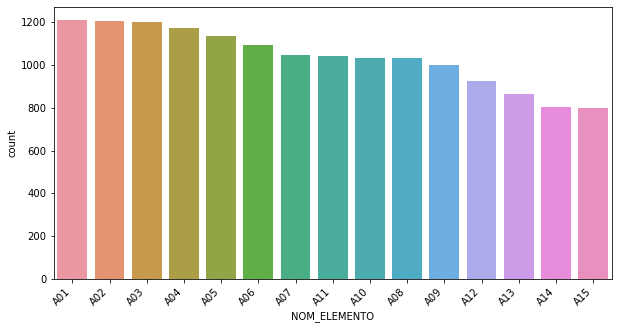

In [39]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x= "NOM_ELEMENTO" ,data = oem_yaw_data, 
              order = oem_yaw_data['NOM_ELEMENTO'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.show()

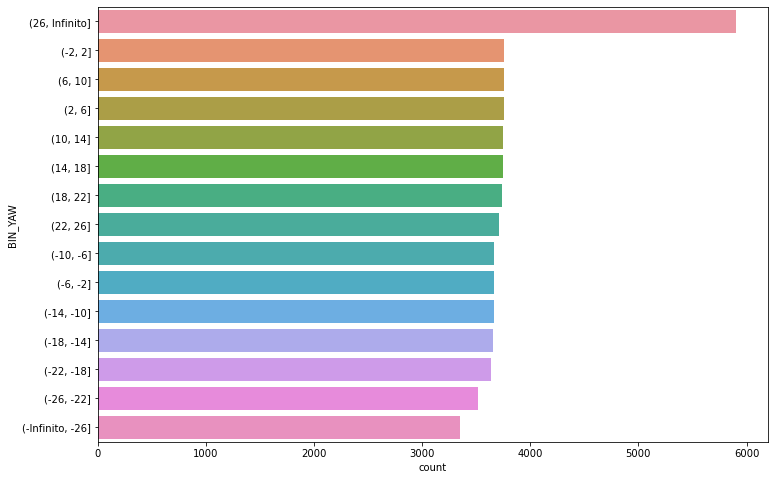

In [44]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "BIN_YAW", data=oem_yaw_data, order=oem_yaw_data['BIN_YAW'].value_counts().iloc[:25].index)
plt.show()

# Alerts

In [49]:
oem_alert = oem_yaw_rank1.groupby(["Model", "BIN_YAW"]).sum()["Yaw_Bin_Rank"].reset_index()
oem_alert

,Model,BIN_YAW,Yaw_Bin_Rank
0,ECO100,"(-10, -6]",21.0
1,ECO100,"(-14, -10]",11.0
2,ECO100,"(-18, -14]",5.0
3,ECO100,"(-2, 2]",12.0
4,ECO100,"(-22, -18]",1.0
...,...,...,...
179,V47-660 kW,"(26, Infinito]",3.0
180,V47-660 kW,"(6, 10]",4.0
181,V66-1.75 MW,"(-2, 2]",7.0
182,V66-1.75 MW,"(2, 6]",2.0


In [52]:
oem_alert = oem_alert.sort_values(by=["Yaw_Bin_Rank"], ascending=False)
oem_alert

,Model,BIN_YAW,Yaw_Bin_Rank
79,G52-850 kW,"(26, Infinito]",1137.0
81,G58-850 kW,"(26, Infinito]",615.0
111,G87-2.0 MW,"(6, 10]",456.0
108,G87-2.0 MW,"(2, 6]",314.0
124,G90-2.0 MW,"(6, 10]",258.0
...,...,...,...
104,G87-2.0 MW,"(-Infinito, -26]",1.0
102,G87-2.0 MW,"(-26, -22]",1.0
133,GE 1.5s,"(-14, -10]",1.0
94,G83-2.0 MW,"(-14, -10]",1.0


In [53]:
oem_alert["BIN_YAW"].value_counts()

(2, 6]              18
(-2, 2]             17
(10, 14]            16
(26, Infinito]      16
(6, 10]             16
(18, 22]            14
(14, 18]            14
(-10, -6]           11
(-14, -10]          11
(-6, -2]            11
(22, 26]            10
(-22, -18]           8
(-18, -14]           8
(-Infinito, -26]     7
(-26, -22]           7
Name: BIN_YAW, dtype: int64

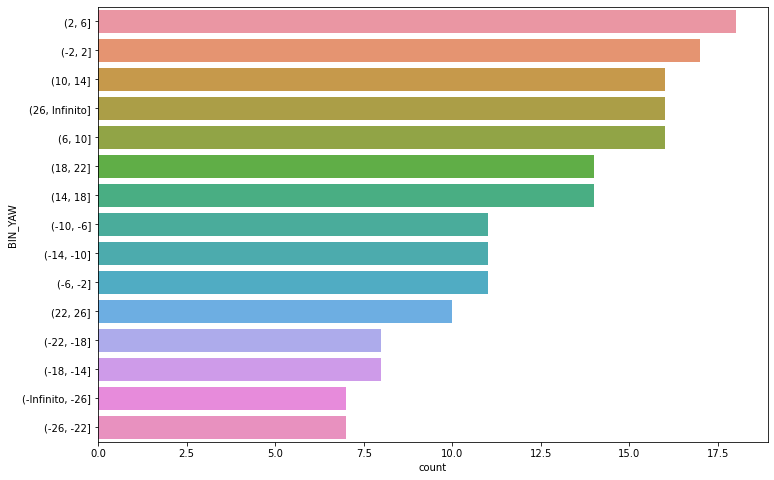

In [55]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "BIN_YAW", data=oem_alert, order=oem_alert['BIN_YAW'].value_counts().index)
plt.show()

# Ordering Based on Bin_Yaw

In [56]:
bin_yaw_order = {"(-Infinito, -26]", "(-26, -22]", "(-22, -18]", "(-18, -14]",
                 "(-14, -10]", "(-10, -6]", "(-6, -2]", "(-2, 2]", "(2, 6]", 
                 "(6, 10]", "(10, 14]", "(14, 18]", "(18, 22]", "(22, 26]", "(26, Infinito]"}

In [57]:
bin_yaw_order_dict = {"(-Infinito, -26]": 1, "(-26, -22]": 2, "(-22, -18]": 3, 
                      "(-18, -14]": 4, "(-14, -10]": 5, "(-10, -6]": 6, "(-6, -2]": 7,
                      "(-2, 2]": 8, "(2, 6]": 9, "(6, 10]": 10, "(10, 14]": 11, 
                      "(14, 18]": 12, "(18, 22]": 13, "(22, 26]": 14, "(26, Infinito]": 15}

In [58]:
alert_ordered = oem_alert.set_index("BIN_YAW").loc[bin_yaw_order]
alert_ordered

,Model,Yaw_Bin_Rank
BIN_YAW,,
"(-2, 2]",G87-2.0 MW,208.0
"(-2, 2]",G90-2.0 MW,137.0
"(-2, 2]",G97-2.0 MW,32.0
"(-2, 2]",G80-2.0 MW,20.0
"(-2, 2]",S88-2.1 MW,15.0
...,...,...
"(22, 26]",G114-2.1 MW,5.0
"(22, 26]",ECO80 S1,2.0
"(22, 26]",G114-2.0 MW,1.0


In [63]:
oem_alert.head()

,Model,BIN_YAW,Yaw_Bin_Rank
79,G52-850 kW,"(26, Infinito]",1137.0
81,G58-850 kW,"(26, Infinito]",615.0
111,G87-2.0 MW,"(6, 10]",456.0
108,G87-2.0 MW,"(2, 6]",314.0
124,G90-2.0 MW,"(6, 10]",258.0


In [67]:
# Let's convert population to integers as its an object at this moment
# oem2['Yaw_Bin_Rank'] = oem2['Yaw_Bin_Rank'].map(lambda x: int(x))

# Searching for Turbine G and Eco

In [77]:
oem_alert.loc[oem_alert["Model"].str.contains("G") , "Model"]

79     G52-850 kW
81     G58-850 kW
111    G87-2.0 MW
108    G87-2.0 MW
124    G90-2.0 MW
          ...    
104    G87-2.0 MW
102    G87-2.0 MW
133       GE 1.5s
94     G83-2.0 MW
115    G90-2.0 MW
Name: Model, Length: 89, dtype: object

In [83]:
oem_alert.loc[oem_alert["Model"].str.contains("ECO") , "Model"]

49    ECO80 V8
0       ECO100
5       ECO100
51    ECO80 V8
3       ECO100
        ...   
15    ECO74 V8
16    ECO74 V8
7       ECO100
18    ECO74 V8
19    ECO74 V8
Name: Model, Length: 61, dtype: object

# Now that we found G and Eco , lets create a list for a DataFrame for G and Eco

In [72]:
model_list = []

for x in alert_ordered["Model"]:
    if x[0] == "G" or x[0:3] == "ECO":
        if x[0:2] != "GE":
            model_list.append(x)
            
model_list = list(set(model_list))
print("Turbine Model G and Eco: ")
print("-"*35)
print(model_list)

Turbine Model G and Eco: 
-----------------------------------
['G90-2.0 MW', 'ECO74 V8', 'G90-LM-2.0 MW', 'ECO80 S9', 'G52 PC-850 kW', 'ECO80 S6', 'G114-2.1 MW', 'G80-2.0 MW', 'G83-2.0 MW', 'G58-850 kW', 'G114-2.625 MW', 'G52-850 kW', 'G58 PC-850 kW', 'ECO80 V8', 'ECO80 S1', 'G97-2.0 MW', 'ECO100', 'G114-2.0 MW', 'G87-2.0 MW']


# Single Plot Alerts for Each model

In [84]:
# create a new DataFrame for only models G and Eco
plot_alert_ordered = alert_ordered[pd.DataFrame(alert_ordered.Model.tolist()).isin(model_list).any(1).values]


fig = px.bar(x=plot_alert_ordered.index, y=plot_alert_ordered["Yaw_Bin_Rank"], color=plot_alert_ordered["Model"])
fig.update_layout(
    title="Alert based on Yaw_Bin_Rank for each Model",
    xaxis_title="BIN_YAW",
    yaxis_title="Alert Model Count",
    font=dict(
        size=13
    )
)
fig.show()

In [ ]:
# Observations

In [ ]:
obs_data = {
    "Model": [
        'ECO74 V8', 
        'ECO80 S6', 
        'ECO80 V8',
        'ECO100', 
        'ECO80 S9', 
        'ECO80 S1',
        'G87-2.0 MW',
        'G58 PC-850 kW',
        'G90-LM-2.0 MW',
        'G83-2.0 MW',
        'G58-850 kW',
        'G114-2.625 MW',
        'G90-2.0 MW',
        'G97-2.0 MW',
        'G52-850 kW',
        'G52 PC-850 kW',
        'G114-2.1 MW',
        'G114-2.0 MW',
        'G80-2.0 MW'
    ],
    
 "Observation": [
     
     "Model ECO74 V8 is observed to be skew to the left. The data is not centered around the non-alert bins but most of the turbines are operating in the non_alert bins.Thus it can be droped for further analysis.",
     "Model ECO80 S6 is a random distribution due to lacks an apparent patterns. Its important to note about 50% of this Model operates in the alert region. Data quality check has to be investigated before further analysis can be considered.",
     "Model ECO80 V8 distribution is skew to the right. The data is not symmetric around the non-alert bins, thus further analysis will be carried out for bin (-Infinito,-26] to (-14,-10]",
     "Model ECO100 is observed to be skew to the right and centered around the alert bins, most of the turbines are operating on these alert bins (-14,-10],(-18,-14 and (-22,-18]. This shows misalignment,therfore further analysis would be considered .",
     "Model ECO80 S9 is a random distribution due to lacks an apparent patterns.Also due to the number of turbines (model) contained in the Global Asset, it can be droped form any further analysis.",
     "Model ECO80 S1 is a random distribution due to lacks an apparent patterns. Its important to note about 50% of this Model operates in the alert region. Data quality check has to be investigated before further analysis can be considered.",
     'Model G87-2.0 MW distribution is skew to the right. Outliers can be identified too, therefore Data quality check should be carried out and further analysis for bin (26,Infinito],(22,26],(18,22],(14,18],(10,14].|',
     'Model G58 PC-850 kW requires Data quality check.',
     'Model G90-LM-2.0 MW requires Data quality check.',
     'Model G83-2.0 MW is a normal distribution.The turbine models are centered around the non-alert bins, therefore it can be droped form further analysis.',
     'Model G58-850 kW requires Data quality check.',
     'Model G114-2.625 MW is Skew to right while representing only alert bins.further analysis will be carried out for bin (10,14],(14,18],(18,22].',
     'Model G90-2.0 MW is Skew to the left.The data is also centered around the non-alert bins but with outliers at bin (10,14],(14,18],(18,22],(22,26] and (26,Infinito].Data quality check has to be investigated before further analysis can be considered.|',
     'Model G97-2.0 MW is Skew to the left. Bin (10,14] would require futher analysis due to the numbers of Turbines opperating in this bin.',
     'Model G52-850 kW requires Data quality check.',
     'Model G52 PC-850 kW requires Data quality check.',
     'Model G114-2.1 MW is observed to be a bimodal distribution,further analysis comparing turbine behaviour between alert and non-alert bins would idealy suit this Model.',
     'Model G114-2.0 MW is skew to the left. Bin (10,14],(14,18] and (18,22] would require futher analysis due to the numbers of Turbines opperating in these bins',
     'Model G80-2.0 MW is observed to be a normail distribution.The turbine models are centered around the non-alert bins.further analysis carred out in bin (10,14],(14,18],(18,22] and (22,26]can be compared with turbine opperating in the non-alert bins. '
  ]
}

In [ ]:
# Lets create a dataframe for the observations

In [91]:
observations = pd.DataFrame(obs_data).set_index("Model")
observations

,Observation
Model,
ECO74 V8,Model ECO74 V8 is observed to be skew to the l...
ECO80 S6,Model ECO80 S6 is a random distribution due to...
ECO80 V8,Model ECO80 V8 distribution is skew to the rig...
ECO100,Model ECO100 is observed to be skew to the rig...
ECO80 S9,Model ECO80 S9 is a random distribution due to...
ECO80 S1,Model ECO80 S1 is a random distribution due to...
G87-2.0 MW,Model G87-2.0 MW distribution is skew to the r...
G58 PC-850 kW,Model G58 PC-850 kW requires Data quality check.
G90-LM-2.0 MW,Model G90-LM-2.0 MW requires Data quality check.


# All models - Plots

In [98]:
def bin_analysis_for_models(data, model_name, message):
    data = data[data["Model"] == model_name]
    
    
    fig = px.bar(x=data.index, y=data["Yaw_Bin_Rank"], color=data["NOM_INSTALACION"])
    fig.update_layout(
        title=f'Alert based on Yaw_Bin_Rank for model "{model_name}"',
        xaxis_title="Bin_Yaw",
        yaxis_title="Alert Count",
        font=dict(
            size=13
        )
    )
    fig.show()
    print("-"*10)
    print(f"OBSERVATION: {message}")
    print("-"*10)
    
    farm = oem_yaw_rank1[oem_yaw_rank1["Model"] == model].groupby("NOM_INSTALACION").count()["Yaw_Bin_Rank"]
    fig = px.bar(x=farm.index, y=farm.values, color_discrete_sequence=["green"])
    fig.update_layout(
        title=f'Alert based on Yaw_Bin_Rank for model "{model}"',
        xaxis_title="Bin_Yaw",
        yaxis_title="Alert Count",
        font=dict(
            size=13
        )
    )
    fig.show()
    
    print("*"*60)    
    print("*"*60)

In [99]:
print(model_list)

['G90-2.0 MW', 'ECO74 V8', 'G90-LM-2.0 MW', 'ECO80 S9', 'G52 PC-850 kW', 'ECO80 S6', 'G114-2.1 MW', 'G80-2.0 MW', 'G83-2.0 MW', 'G58-850 kW', 'G114-2.625 MW', 'G52-850 kW', 'G58 PC-850 kW', 'ECO80 V8', 'ECO80 S1', 'G97-2.0 MW', 'ECO100', 'G114-2.0 MW', 'G87-2.0 MW']


In [100]:
oem_alert=oem_yaw_rank1.groupby(['Model','BIN_YAW', 'NOM_INSTALACION']).sum()['Yaw_Bin_Rank'].reset_index()
oem_alert = oem_alert.sort_values(by=['Yaw_Bin_Rank'], ascending=False)

alert_ordered = oem_alert.set_index("BIN_YAW").loc[bin_yaw_order]
alert_ordered

,Model,NOM_INSTALACION,Yaw_Bin_Rank
BIN_YAW,,,
"(-2, 2]",G87-2.0 MW,HARESTANES,22.0
"(-2, 2]",G90-2.0 MW,CALANGO III,15.0
"(-2, 2]",G87-2.0 MW,DOLAR III,14.0
"(-2, 2]",G97-2.0 MW,BAFFIN BAY,13.0
"(-2, 2]",G97-2.0 MW,PIER II,13.0
...,...,...,...
"(22, 26]",G90-2.0 MW,ARGAÑOSO,1.0
"(22, 26]",G90-2.0 MW,HARDSCRABBLE,1.0
"(22, 26]",G90-2.0 MW,HARESTANES,1.0


# Loop to plot all models from the above function

In [103]:
for model in model_list:
    message = observations[observations.index == model]["Observation"][model]
    bin_analysis_for_models(alert_ordered, model, message)

----------
OBSERVATION: Model G90-2.0 MW is Skew to the left.The data is also centered around the non-alert bins but with outliers at bin (10,14],(14,18],(18,22],(22,26] and (26,Infinito].Data quality check has to be investigated before further analysis can be considered.|
----------


************************************************************
************************************************************


----------
OBSERVATION: Model ECO74 V8 is observed to be skew to the left. The data is not centered around the non-alert bins but most of the turbines are operating in the non_alert bins.Thus it can be droped for further analysis.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G90-LM-2.0 MW requires Data quality check.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model ECO80 S9 is a random distribution due to lacks an apparent patterns.Also due to the number of turbines (model) contained in the Global Asset, it can be droped form any further analysis.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G52 PC-850 kW requires Data quality check.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model ECO80 S6 is a random distribution due to lacks an apparent patterns. Its important to note about 50% of this Model operates in the alert region. Data quality check has to be investigated before further analysis can be considered.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G114-2.1 MW is observed to be a bimodal distribution,further analysis comparing turbine behaviour between alert and non-alert bins would idealy suit this Model.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G80-2.0 MW is observed to be a normail distribution.The turbine models are centered around the non-alert bins.further analysis carred out in bin (10,14],(14,18],(18,22] and (22,26]can be compared with turbine opperating in the non-alert bins. 
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G83-2.0 MW is a normal distribution.The turbine models are centered around the non-alert bins, therefore it can be droped form further analysis.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G58-850 kW requires Data quality check.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G114-2.625 MW is Skew to right while representing only alert bins.further analysis will be carried out for bin (10,14],(14,18],(18,22].
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G52-850 kW requires Data quality check.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G58 PC-850 kW requires Data quality check.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model ECO80 V8 distribution is skew to the right. The data is not symmetric around the non-alert bins, thus further analysis will be carried out for bin (-Infinito,-26] to (-14,-10]
----------


************************************************************
************************************************************


----------
OBSERVATION: Model ECO80 S1 is a random distribution due to lacks an apparent patterns. Its important to note about 50% of this Model operates in the alert region. Data quality check has to be investigated before further analysis can be considered.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G97-2.0 MW is Skew to the left. Bin (10,14] would require futher analysis due to the numbers of Turbines opperating in this bin.
----------


************************************************************
************************************************************


----------
OBSERVATION: Model ECO100 is observed to be skew to the right and centered around the alert bins, most of the turbines are operating on these alert bins (-14,-10],(-18,-14 and (-22,-18]. This shows misalignment,therfore further analysis would be considered .
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G114-2.0 MW is skew to the left. Bin (10,14],(14,18] and (18,22] would require futher analysis due to the numbers of Turbines opperating in these bins
----------


************************************************************
************************************************************


----------
OBSERVATION: Model G87-2.0 MW distribution is skew to the right. Outliers can be identified too, therefore Data quality check should be carried out and further analysis for bin (26,Infinito],(22,26],(18,22],(14,18],(10,14].|
----------


************************************************************
************************************************************


# Further Analysis

In [104]:
further_analysis= {
    "ideal": [
    'ECO100'
    ],
    "further_analysis": [
    'G87-2.0 MW',
    'G80-2.0 MW',
    'ECO80 V8',
    'G114-2.625 MW',
    'G90-2.0 MW',
    'G114-2.1 MW',
    'G114-2.0 MW'
    ],
    "error_data": [
    'G58 PC-850 kW',
    'G90-LM-2.0 MW',
    'ECO80 S1',
    'G58-850 kW',
    'G52-850 kW',
    'ECO80 S6'
    ],
    "drop":[
    'ECO74 V8',
    'G83-2.0 MW',
    'ECO80 S9',
    'G52 PC-850 kW'
    ]
}

### Choosing a model for Analysis = `G114-2.1 MW`

In [105]:
model_name = "G114-2.1 MW"

In [108]:
oem_alert=oem_yaw_rank1.groupby(['Model','BIN_YAW', 'NOM_INSTALACION']).sum()['Yaw_Bin_Rank'].reset_index()
oem_alert = oem_alert.sort_values(by=['Yaw_Bin_Rank'], ascending=False)
alert_ordered = oem_alert.set_index("BIN_YAW").loc[bin_yaw_order]
data = alert_ordered

data

,Model,NOM_INSTALACION,Yaw_Bin_Rank
BIN_YAW,,,
"(-2, 2]",G87-2.0 MW,HARESTANES,22.0
"(-2, 2]",G90-2.0 MW,CALANGO III,15.0
"(-2, 2]",G87-2.0 MW,DOLAR III,14.0
"(-2, 2]",G97-2.0 MW,BAFFIN BAY,13.0
"(-2, 2]",G97-2.0 MW,PIER II,13.0
...,...,...,...
"(22, 26]",G90-2.0 MW,ARGAÑOSO,1.0
"(22, 26]",G90-2.0 MW,HARDSCRABBLE,1.0
"(22, 26]",G90-2.0 MW,HARESTANES,1.0
